In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Reading Train and Test files

In [35]:
train = pd.read_csv("/kaggle/input/emnist/emnist-mnist-train.csv")
test = pd.read_csv("/kaggle/input/emnist/emnist-mnist-test.csv")

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 4 to 0.544
dtypes: int64(785)
memory usage: 359.3 MB


In [37]:
train.describe()

,4,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.0,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0
mean,4.500008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000550,0.000550,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.134723,0.134723,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.000000,33.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test.describe()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624
count,9999.000000,9999.0,9999.0,9999.0,9999.0,9999.0,9999.000000,9999.000000,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
mean,4.500350,0.0,0.0,0.0,0.0,0.0,0.000300,0.000200,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872355,0.0,0.0,0.0,0.0,0.0,0.030002,0.020001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,3.000000,2.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y = train.iloc[:,0]
X = train.iloc[:,1:]
X.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_test = test.iloc[:,0]
X_test = test.iloc[:,1:]
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Displaying 5 random images from train

images label  1


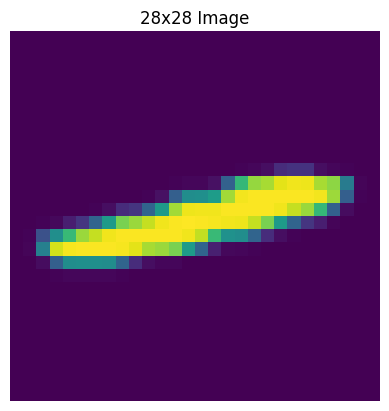

images label  4


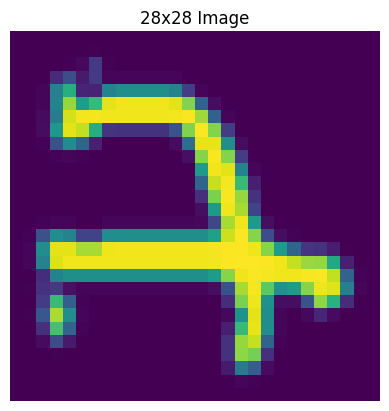

images label  3


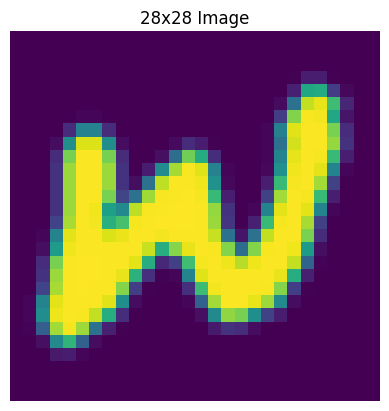

images label  6


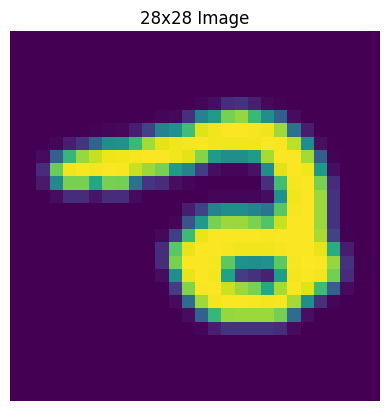

images label  4


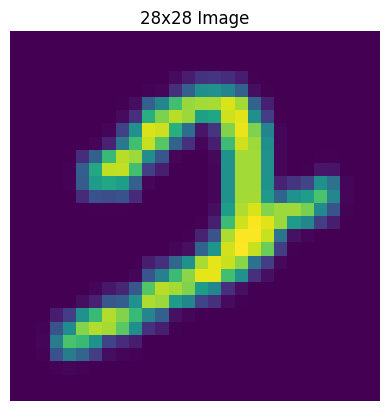

In [41]:
z = np.random.randint(0,500,5)
for i in z:
    image_data = X.iloc[i].values  # Get the pixel data as a numpy array
    print("images label ",y[i])
    # Reshape the 784-length array to a 28x28 matrix
    image_data = image_data.reshape(28, 28)
#     print(image_data)
    # Display the image using Matplotlib
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

# Displaying 5 random images from test

images label  0


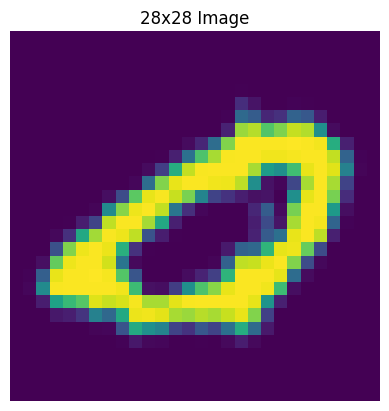

images label  7


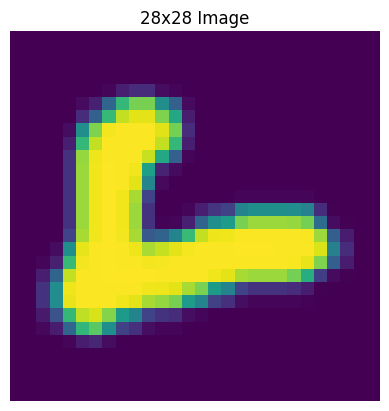

images label  7


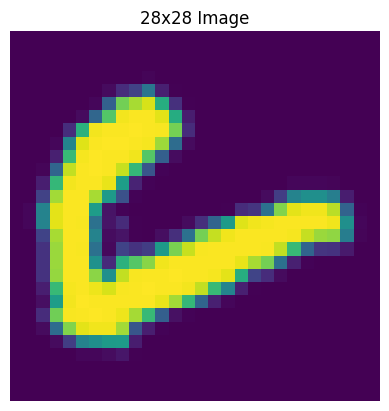

images label  5


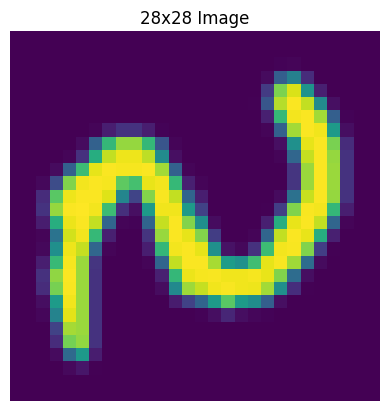

images label  9


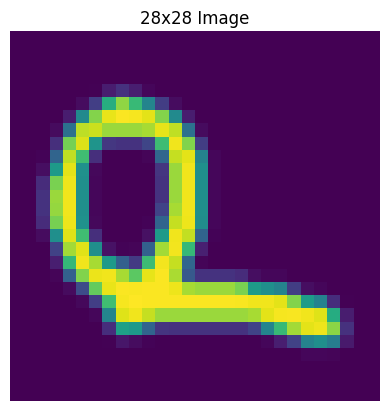

In [42]:
for i in z:
    image_data = X_test.iloc[i].values  # Get the pixel data as a numpy array
    print("images label ",y_test[i])
    # Reshape the 784-length array to a 28x28 matrix
    image_data = image_data.reshape(28, 28)
#     print(image_data)
    # Display the image using Matplotlib
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

# flipping images in dataset as images are Flipped

Image label 1


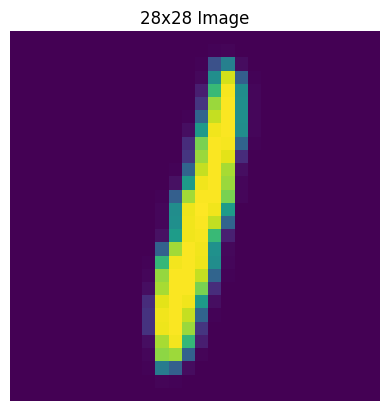

Image label 4


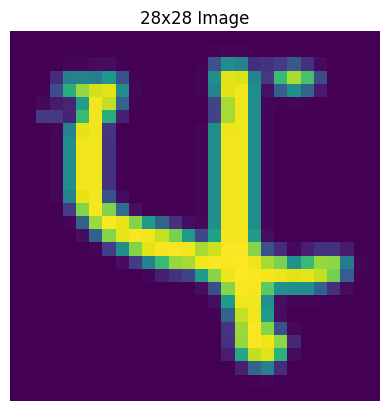

Image label 3


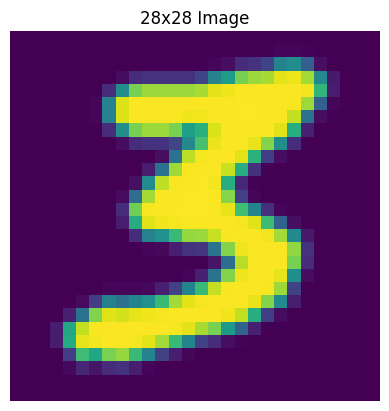

Image label 6


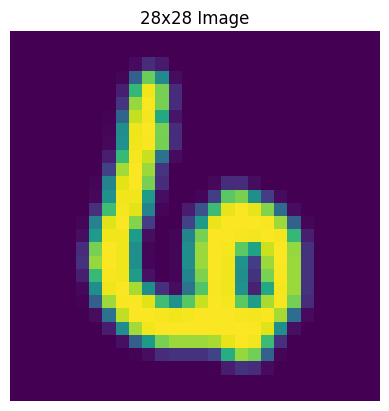

Image label 4


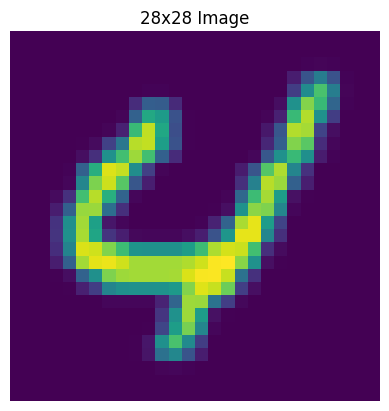

In [43]:
for i in z:
    image_data = X.iloc[i].values  # Get the pixel data as a numpy array
    print("Image label",y[i])
    
    image_data = image_data.reshape(28, 28).T
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

Image label 0


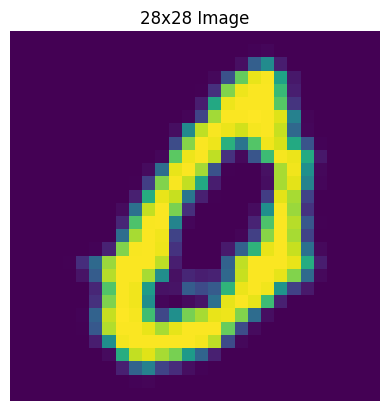

Image label 7


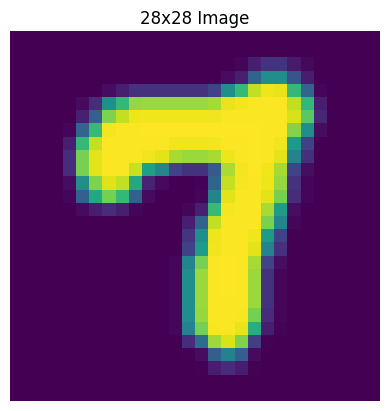

Image label 7


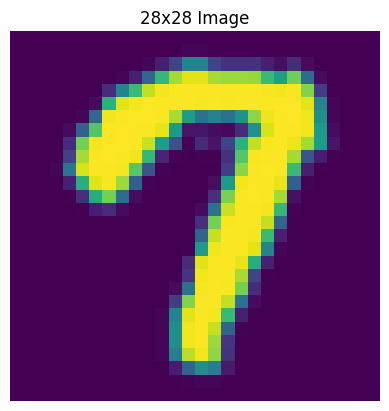

Image label 5


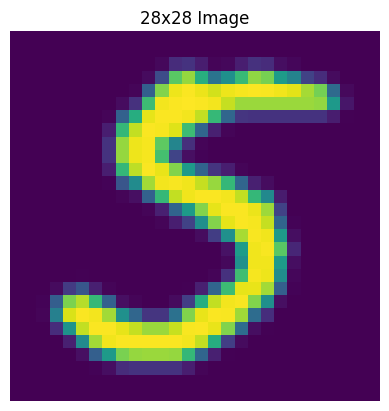

Image label 9


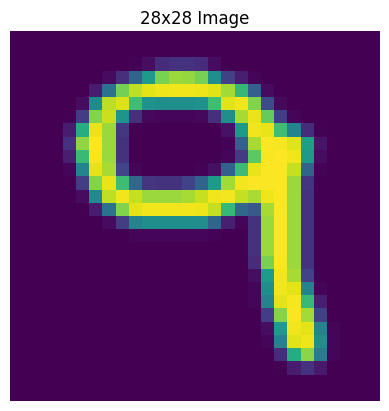

In [44]:
for i in z:
    image_data = X_test.iloc[i].values  # Get the pixel data as a numpy array
    print("Image label",y_test[i])
    
    image_data = image_data.reshape(28, 28).T
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

# **Making Changes into dataset

In [45]:
for i in range(0,len(X)):
    image_data = X.iloc[i].values  # Get the pixel data as a numpy array
    
    image_data = image_data.reshape(28, 28).T.flatten()
    X.loc[i] = image_data 

/tmp/ipykernel_30/2463241115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[i] = image_data


Image label 1


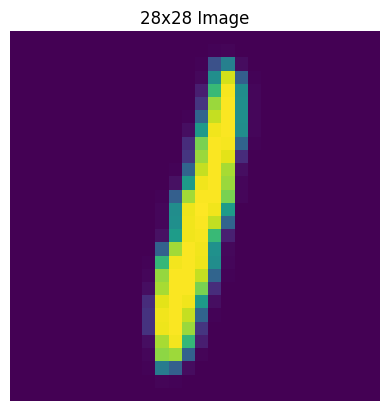

Image label 4


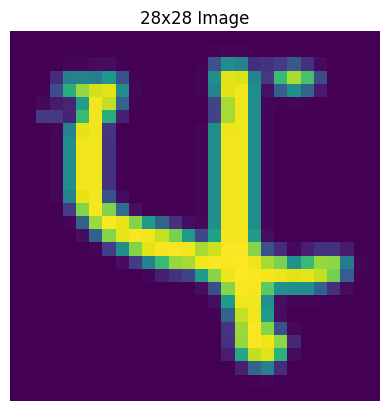

Image label 3


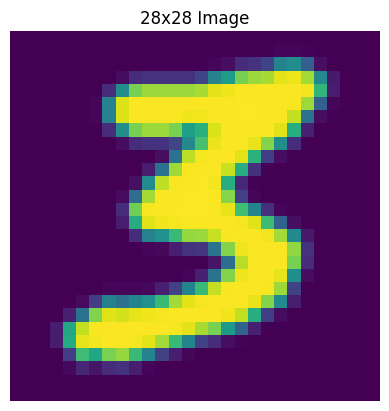

Image label 6


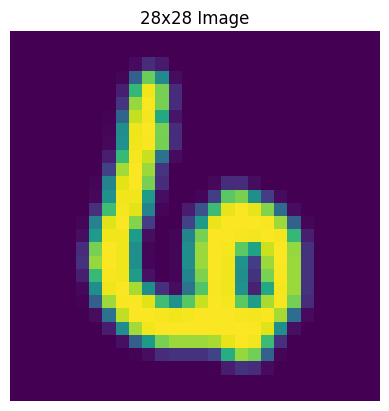

Image label 4


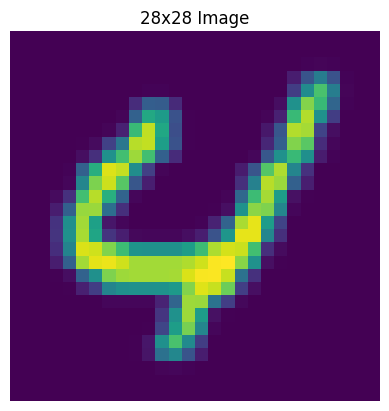

In [47]:
for i in z:
    image_data = X.iloc[i].values  # Get the pixel data as a numpy array
    print("Image label",y[i])
    
    image_data = image_data.reshape(28, 28)
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

# similarly flipping in test dataset

In [52]:
for i in range(0,len(X_test)):
    image_data = X_test.iloc[i].values  # Get the pixel data as a numpy array
    
    X_test.loc[i] = image_data.reshape(28, 28).T.flatten()
    

/tmp/ipykernel_30/704725282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[i] = image_data.reshape(28, 28).T.flatten()


Image label 0


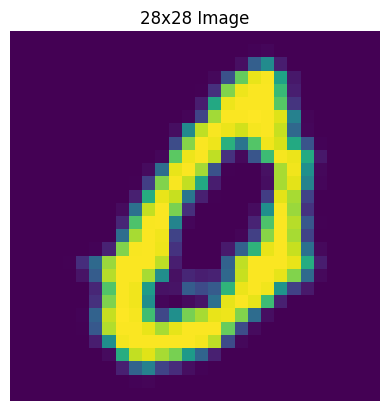

Image label 7


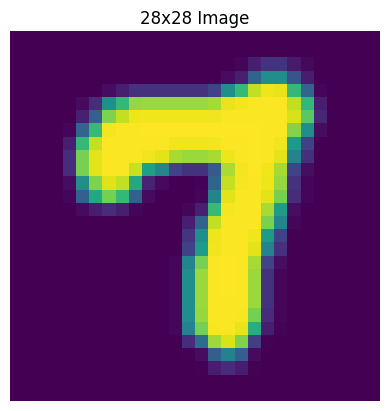

Image label 7


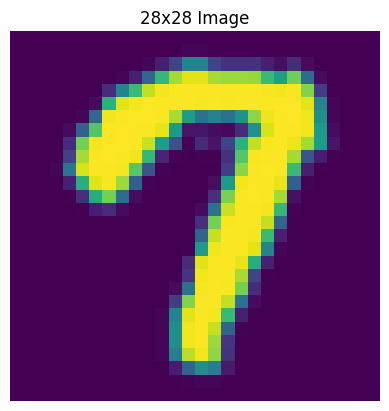

Image label 5


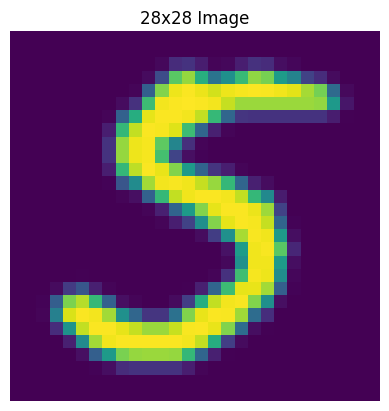

Image label 9


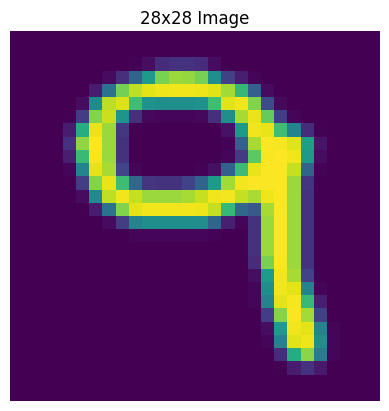

In [53]:
for i in z:
    image_data = X_test.iloc[i].values  # Get the pixel data as a numpy array
    print("Image label",y_test[i])
    
    image_data = image_data.reshape(28, 28)
    plt.imshow(image_data)
    plt.title("28x28 Image")
    plt.axis('off')  # Optional: turn off the axis
    plt.show()

# Creating A CNN model

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [55]:
image_data = X.values
image_data = image_data.reshape(-1,28,28,1).astype(np.float32)
image_data /= 255.0
X_train, X_val, y_train, y_val = train_test_split(image_data, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47999, 28, 28, 1), (12000, 28, 28, 1), (47999,), (12000,))

# Model Build

In [56]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))


In [57]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# creating callbacks
checkpoint = ModelCheckpoint("best_model.keras",monitor  = "val_accuracy",save_best_only = True,verbose =1 )
es = EarlyStopping(monitor = "val_loss", patience = 10, verbose = 1 ,restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_loss",factor = .5, patience = 5, verbose = 1)
callback_list = [checkpoint,es,rlr]

In [60]:
model.fit(X_train,y_train,batch_size = 32, epochs = 30, validation_data = (X_val,y_val),callbacks=callback_list)

Epoch 1/30


I0000 00:00:1729007263.524412     298 service.cc:145] XLA service 0x7fbe240059f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729007263.524464     298 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729007263.524467     298 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  86/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4206 - loss: 1.6502

I0000 00:00:1729007267.618505     298 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.4150
Epoch 1: val_accuracy improved from -inf to 0.98425, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8653 - loss: 0.4149 - val_accuracy: 0.9843 - val_loss: 0.0546 - learning_rate: 0.0010
Epoch 2/30
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0658
Epoch 2: val_accuracy improved from 0.98425 to 0.98925, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0658 - val_accuracy: 0.9893 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 3/30
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9867 - loss: 0.0473
Epoch 3: val_accuracy improved from 0.98925 to 0.98933, saving model to best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0473 - val_accuracy: 0.9893 - val_loss: 0.0378 - learning_rate: 0.0010
Epoch 4/30
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [61]:
image_data_test = X_test.values
image_data_test = image_data_test.reshape(-1,28,28,1).astype(np.float32)
image_data_test /= 255.0

# Prediction on Test dataset

In [62]:
# Make predictions on the test set
predictions = model.predict(image_data_test)

# Convert predicted probabilities to class labels
ypred = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
wrong_pred = (ypred != y_test)

In [64]:
a = wrong_pred[wrong_pred==True].index

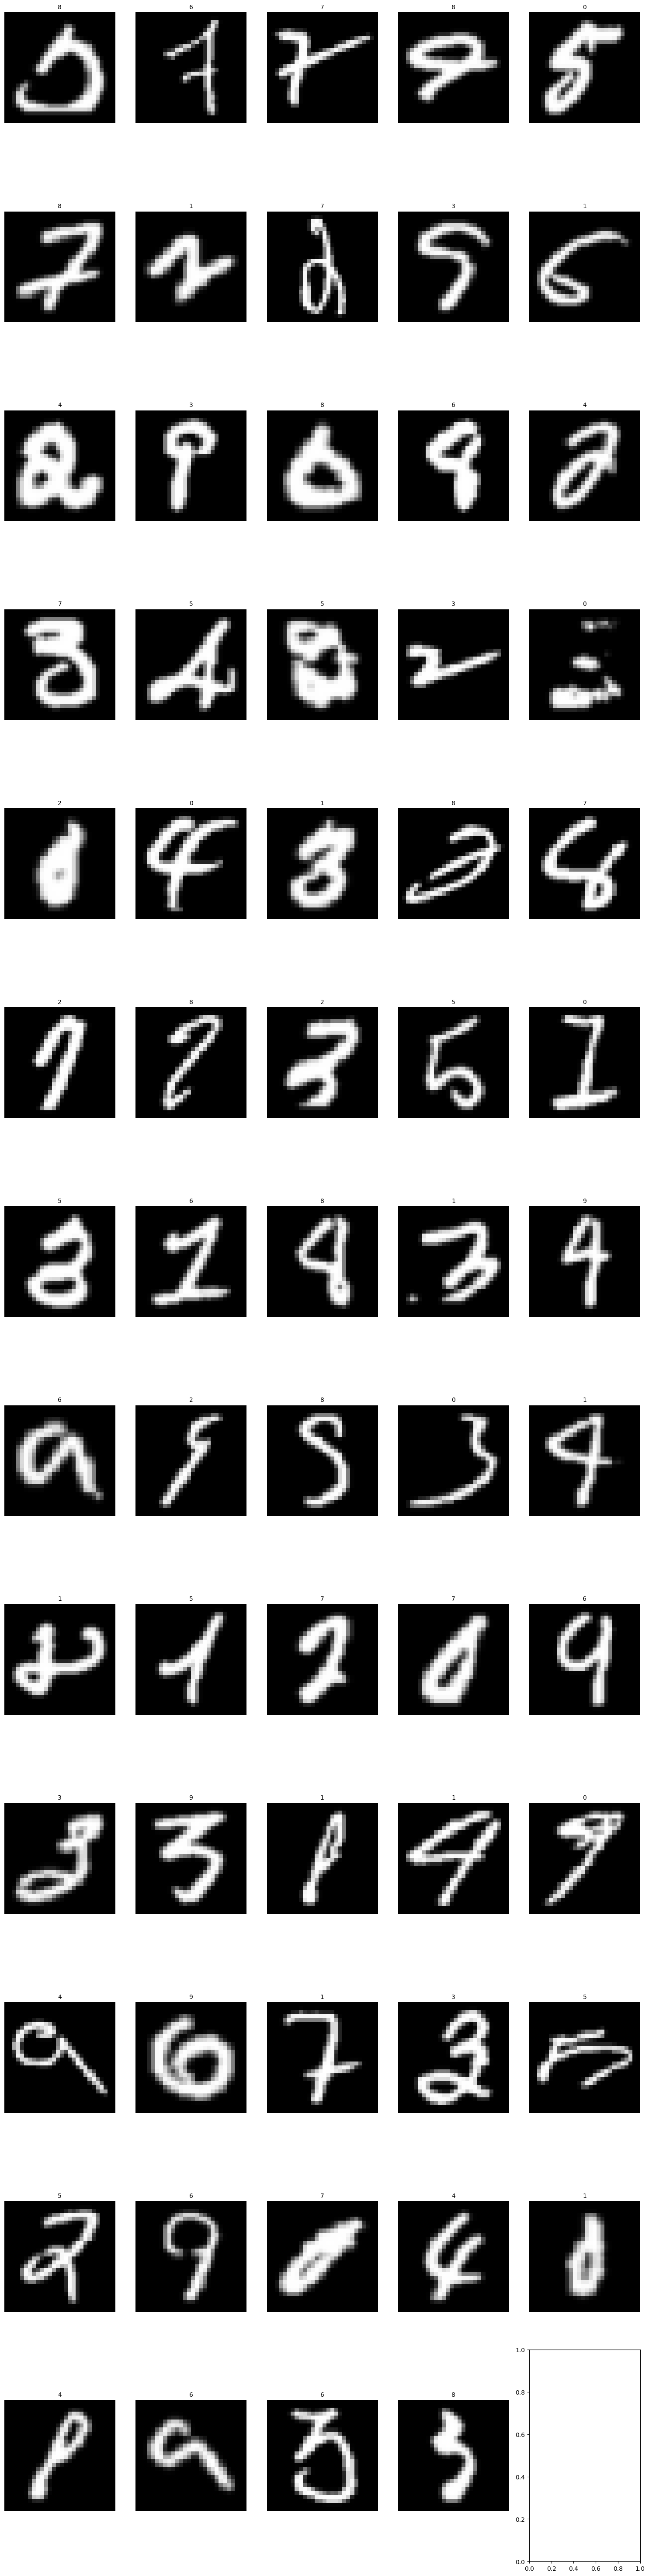

In [73]:
import matplotlib.pyplot as plt

# Assuming 'images' is a list or array containing 99 images of shape (28, 28)
# Display the images in a grid of 20 rows and 5 columns
fig, axes = plt.subplots((len(a)//5) +1, 5, figsize=(15, 60))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the images and axes to display them
for i in range(len(a)):
    axes[i].imshow(np.array(X_test.iloc[a[i]]).reshape(28,28), cmap='gray')
    axes[i].set_title(f"{y_test[i]}", fontsize=10)
    axes[i].axis('off')  # Turn off the axis for clarity


# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

# on User Image digit.

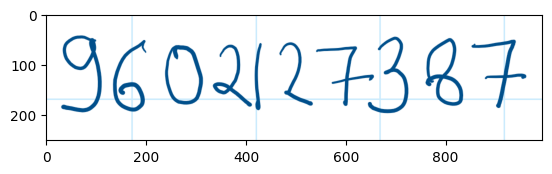

In [75]:
plt.imshow(plt.imread("/kaggle/input/number-image-for-cnn/Screenshot 2024-10-15 214754.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Mobile Number: 9602127387


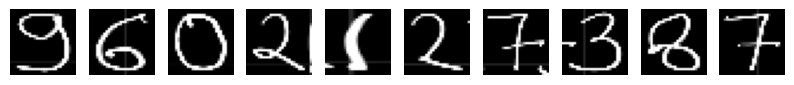

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def detect_background_and_ink(image):
    # Calculate the mean pixel value
    mean_val = np.mean(image)
    
    # If the mean pixel value is above 128, assume a light background with dark ink
    if mean_val > 128:
        return 'light_background'
    else:
        return 'dark_background'

def preprocess_image(image_path, padding=10):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Detect the background and ink type
    background_type = detect_background_and_ink(image)
    
    # If the background is light, invert the image to have dark background and white digits
    if background_type == 'light_background':
        image = cv2.bitwise_not(image)

    # Apply thresholding to binarize the image
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Find contours of the digits
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours from left to right to maintain the order of the digits
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    digit_images = []
    for contour in contours:
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Add padding around the bounding box
        x = max(x - padding, 0)
        y = max(y - padding, 0)
        w = w + 2 * padding
        h = h + 2 * padding

        # Extract the region of interest (digit) from the original grayscale image
        digit = image[y:y+h, x:x+w]

        # Resize to 28x28 pixels as required by the MNIST model
        digit = cv2.resize(digit, (28, 28))

        # Normalize the pixel values to range [0, 1]
        digit = digit / 255.0

        # Reshape to (28, 28, 1) to match the model input shape
        digit = digit.reshape(28, 28, 1)

        # Append the processed digit to the list
        digit_images.append(digit)

    return digit_images

def predict_digits(model, digit_images):
    # Convert the list of images to a numpy array
    digit_images = np.array(digit_images)

    # Make predictions using the model
    predictions = model.predict(digit_images)

    # Get the digit with the highest probability for each prediction
    predicted_digits = [np.argmax(prediction) for prediction in predictions]

    return predicted_digits

# Path to the image containing the mobile number
image_path = '/kaggle/input/number-image-for-cnn/Screenshot 2024-10-15 214754.png'  # Provide the correct path to your image

# Preprocess the image to extract individual digit images
digit_images = preprocess_image(image_path, padding=10)  # Adjust the padding value as needed

# Predict each digit using the loaded MNIST model
predicted_digits = predict_digits(model, digit_images)

# Display the predicted mobile number
print("Predicted Mobile Number:", ''.join(map(str, predicted_digits)))

# Optional: Plot the individual digits
plt.figure(figsize=(10, 2))
for i, digit_image in enumerate(digit_images):
    plt.subplot(1, len(digit_images), i + 1)
    plt.imshow(digit_image.squeeze(), cmap='gray')
    plt.axis('off')
plt.show()
